In [1]:
import numpy as np

# Q1

In [2]:
A = np.array([[6, -2],
             [-2, 9]])

In [3]:
eigvals, eigvecs = np.linalg.eigh(A)
print("特征值：\n", eigvals)
print("特征向量（列向量）：\n", eigvecs)

特征值：
 [ 5. 10.]
特征向量（列向量）：
 [[-0.89442719 -0.4472136 ]
 [-0.4472136   0.89442719]]


In [4]:
P = eigvecs #P是特征矩阵
D = np.diag(eigvals) #D是两个特征值构成的矩阵[[5, 0],[0, 10]],特征值位置与特征向量在特征矩阵内位置一致

In [5]:
A_reconstructed = P @ D @ P.T
print(A_reconstructed)

[[ 6. -2.]
 [-2.  9.]]


# Q2

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("ws2_india.csv", index_col=0) # 指定第 0 列（Region）为index
df

,Total,Assamese,Bengali,Bodo,Dogri,Gujarati,Hindi,Kannada,Kashmiri,Konkani,...,Odia,Punjabi,Sanskrit,Santali,Sindhi,Tamil,Telugu,Urdu,Total_Scheduled,Non_Scheduled
Region,,,,,,,,,,,,,,,,,,,,,
Jammu & Kashmir,10000,7,16,0,2004,15,2083,6,5327,0,...,8,175,0,0,0,12,11,16,9727,273
Himachal Pradesh,10000,2,9,0,34,15,8588,1,83,0,...,5,896,1,1,0,2,2,8,9791,209
Punjab,10000,1,10,0,7,5,935,1,1,0,...,4,8982,0,0,0,4,3,10,9986,14
Chandigarh,10000,4,59,0,10,15,7360,4,13,1,...,18,2203,0,0,1,53,13,100,9981,19
Uttarakhand,10000,2,150,0,5,4,8915,1,2,0,...,4,261,0,0,3,3,3,422,9944,56
Haryana,10000,2,28,0,1,3,8805,1,2,0,...,6,947,0,0,1,5,4,148,9982,18
NCT of Delhi,10000,5,129,0,4,24,8492,6,11,1,...,22,520,0,0,19,49,15,517,9982,18
Rajasthan,10000,0,12,0,1,10,8939,1,1,0,...,2,332,0,0,56,1,1,97,9464,536
Uttar Pradesh,10000,1,12,0,0,1,9408,0,0,0,...,1,25,0,0,1,1,1,542,9998,2


In [3]:
# 先把名称列和总计列（值都是10000，不用参与计算）去掉
df_numeric = df.drop(columns=["Total", "Total_Scheduled", "Non_Scheduled"])

In [8]:
#标准化，值与均值的插值除以每一列的标准差（.std）。axis=0代表列
#df_numeric = (df_numeric - df_numeric.mean(axis=0)) / df_numeric.std(axis=0)
X = df_numeric.values
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [14]:
# 计算协方差（不进行标准化，受变量尺度影响）/相关矩阵（进行标准化）
cov = np.cov(X, rowvar=False) # rowvar=False 表示变量在列中，得到cov.shape = (p, p)，p为列数（变量数）

In [19]:
# 特征分解（PCA 核心步骤）
eigvals, eigvecs = np.linalg.eigh(cov)

# 按特征值从大到小排序
idx = np.argsort(eigvals)[::-1] # 构建倒序索引
eigvals = eigvals[idx] # 使用倒序索引，对特征值列表排序
eigvecs = eigvecs[:, idx] # 对特征向量按 列 依照倒序索引排序

In [20]:
# 投影到前两个主成分
PCs = X @ eigvecs[:, :2] #eigvecs[:, :2].shape = (p, 2)

In [20]:
# 方差解释比例
explained_ratio = eigvals / eigvals.sum()
print("Explained variance ratio of PC1 and PC2:", explained_ratio[:2])

Explained variance ratio of PC1 and PC2: [0.14118188 0.10285912]


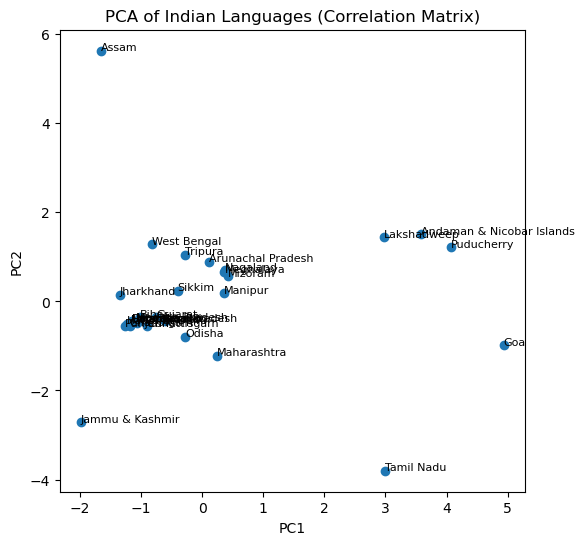

In [21]:
# 绘制前两个主成分
plt.figure(figsize=(6,6))
plt.scatter(PCs[:,0], PCs[:,1])

for i, region in enumerate(df_numeric.index):
    plt.text(PCs[i,0], PCs[i,1], region, fontsize=8)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Indian Languages (Correlation Matrix)")
plt.show()


In [1]:
import sys, os
print("Python:", sys.executable)
print("CWD:", os.getcwd())


Python: e:\Anaconda\envs\text_analytics\python.exe
CWD: e:\files\Bristol\AITA\AI materials\2025_26-AI-materials\worksheets
